In [1]:
import numpy as np
import sys
from copy import deepcopy
import matplotlib.pyplot as plt
import pandas as pd
from classevy.klas import StudentGroup, Klas, Plan, PlanPopulation

In [2]:
students = StudentGroup('../data/students_no_cond.csv')

In [3]:
pop = PlanPopulation(students, 20, 2)

With a given list of students, there's only so much you can do. I.e. if there's an odd number of students and an even number of classes, then you can't have classes of the same size, or with the same average gender. So on each plan, based on the student list, we can define the best outcome possible on each target. `spread_age`, `spread_gender` and `spread_score` of a `Plan` are defined as the standard deviation across classes of `age`, `gender` and `score`, respectively. In turn, those attributes per class are defined as the average across the students in the class.
So if the students for example consist of 5 girls and 6 boys, the best possible `Plan` will have 3 boys + 3 girls and 3 boys + 2 girls in 2 classes. 
That means that for:
- Class 1:
    - gender = 0
    - size = 6
- Class 2:
    - gender = (3-2)/5 = -1/5 (boys are coded as 1, girls as -1)
    - size = 5
    
Since standard deviation is defined as:

$\sigma = \sqrt{\frac{\sum{(x_i-\mu)^2}}{N}}$

This results in a `spread_gender` of 0.1 and `spread_size` of 0.5. It's futile to try to get better results than that.
Note that if the number of boys and girls are both odd, there's an inherent tension between class size and average gender. Take the example of 5 and 5: average gender being equal in both classes would lead to 2 boys + 2 girls and 3+3. However, we could also look at targeting abs(average(gender)) being equal. But it's quickly clear why that wouldn't work. Because then having 5 boys in 1 and 5 girls in the other class would be a perfect solution. By minimizing the spread on gender, we target at the same time average gender in each class toward zero. Because shifting the balance inherently increases the spread.

In [4]:
pop.df

,Individual,spread_score_math,spread_score_spelling,spread_gender,spread_learning_advantage,spread_size,assignment_check
0,<classevy.klas.PlanPopulation.__init__.<locals...,0.525,0.375,0.0,0.041667,1.5,True
1,<classevy.klas.PlanPopulation.__init__.<locals...,0.15,0.225,0.15,0.108333,1.5,True
2,<classevy.klas.PlanPopulation.__init__.<locals...,0.741758,0.395604,0.197802,0.112637,0.5,True
3,<classevy.klas.PlanPopulation.__init__.<locals...,0.153409,0.051136,0.102273,0.045455,2.5,True
4,<classevy.klas.PlanPopulation.__init__.<locals...,0.593407,0.024725,0.098901,0.112637,0.5,True
5,<classevy.klas.PlanPopulation.__init__.<locals...,0.333333,0.25,0.166667,0.055556,4.5,True
6,<classevy.klas.PlanPopulation.__init__.<locals...,0.222527,0.098901,0.049451,0.038462,0.5,True
7,<classevy.klas.PlanPopulation.__init__.<locals...,0.074176,0.123626,0.049451,0.038462,0.5,True
8,<classevy.klas.PlanPopulation.__init__.<locals...,0.153409,0.409091,0.255682,0.107955,2.5,True
9,<classevy.klas.PlanPopulation.__init__.<locals...,0.306818,0.025568,0.102273,0.03125,2.5,True


In [ ]:
pop.pareto()[pop.goals_dict.keys()]

In [6]:
pop.summary()

{'spread_score_math': 0.26700066477639994,
 'spread_score_spelling': 0.2249471361971362,
 'spread_gender': 0.12718521674404026,
 'spread_learning_advantage': 0.07005496545937723,
 'spread_size': 2.05,
 'assignment_check': 1.0}

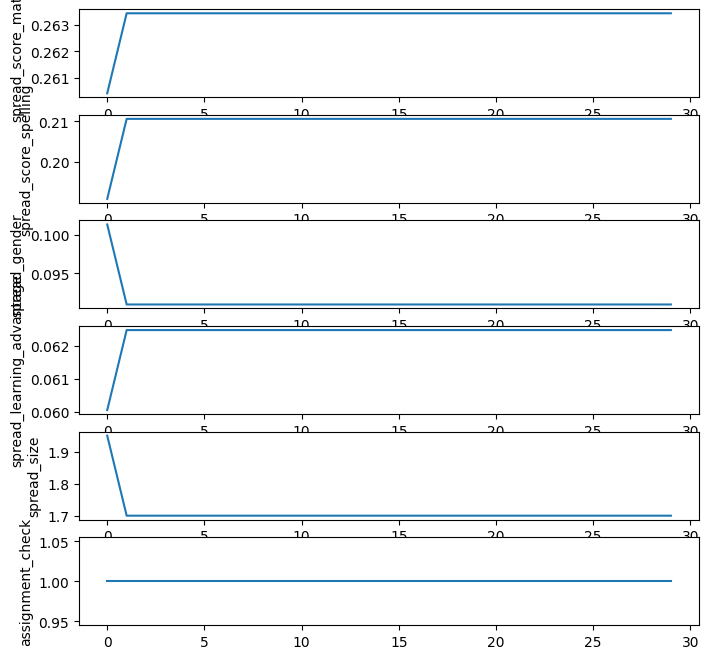

In [7]:
pop.run(n_gen=30)
pop.plot_progress()

In [8]:
pop.pareto()

,Individual,spread_score_math,spread_score_spelling,spread_gender,spread_learning_advantage,spread_size,assignment_check
0,<classevy.klas.PlanPopulation.__init__.<locals...,0.525,0.375,0.0,0.041667,1.5,True
1,<classevy.klas.PlanPopulation.__init__.<locals...,0.741758,0.395604,0.197802,0.112637,0.5,True
2,<classevy.klas.PlanPopulation.__init__.<locals...,0.593407,0.024725,0.098901,0.112637,0.5,True
3,<classevy.klas.PlanPopulation.__init__.<locals...,0.222527,0.098901,0.049451,0.038462,0.5,True
4,<classevy.klas.PlanPopulation.__init__.<locals...,0.074176,0.123626,0.049451,0.038462,0.5,True
5,<classevy.klas.PlanPopulation.__init__.<locals...,0.306818,0.025568,0.102273,0.03125,2.5,True
6,<classevy.klas.PlanPopulation.__init__.<locals...,0.383523,0.204545,0.051136,0.03125,2.5,True
7,<classevy.klas.PlanPopulation.__init__.<locals...,0.079412,0.105882,0.105882,0.029412,3.5,True
8,<classevy.klas.PlanPopulation.__init__.<locals...,0.166667,0.083333,0.0,0.055556,4.5,True
9,<classevy.klas.PlanPopulation.__init__.<locals...,0.148352,0.247253,0.197802,0.112637,0.5,True


In [9]:
front = pop.pareto()

In [10]:
front['sum'] = sum([front[col] for col in pop.goals_names])

In [11]:
front.sort_values('sum')

,Individual,spread_score_math,spread_score_spelling,spread_gender,spread_learning_advantage,spread_size,assignment_check,sum
4,<classevy.klas.PlanPopulation.__init__.<locals...,0.074176,0.123626,0.049451,0.038462,0.5,True,0.785714
3,<classevy.klas.PlanPopulation.__init__.<locals...,0.222527,0.098901,0.049451,0.038462,0.5,True,0.909341
18,<classevy.klas.PlanPopulation.__init__.<locals...,0.148352,0.197802,0.049451,0.038462,0.5,True,0.934066
17,<classevy.klas.PlanPopulation.__init__.<locals...,0.222527,0.173077,0.049451,0.112637,0.5,True,1.057692
9,<classevy.klas.PlanPopulation.__init__.<locals...,0.148352,0.247253,0.197802,0.112637,0.5,True,1.206044
12,<classevy.klas.PlanPopulation.__init__.<locals...,0.148352,0.247253,0.197802,0.112637,0.5,True,1.206044
2,<classevy.klas.PlanPopulation.__init__.<locals...,0.593407,0.024725,0.098901,0.112637,0.5,True,1.32967
10,<classevy.klas.PlanPopulation.__init__.<locals...,0.222527,0.568681,0.197802,0.10989,0.5,True,1.598901
16,<classevy.klas.PlanPopulation.__init__.<locals...,0.075,0.075,0.15,0.033333,1.5,True,1.833333
19,<classevy.klas.PlanPopulation.__init__.<locals...,0.15,0.225,0.0,0.033333,1.5,True,1.908333


In [12]:
best_plan = front.sort_values('sum').iloc[0].values[0]

In [13]:
best_plan.classes_gender

[0.2857142857142857, 0.38461538461538464]

In [14]:
students['gender'].mean()

0.3333333333333333

In [15]:
best_plan.classes[0].print_names()

luuk
pat
karl
darius
marius
maria
marie
pier
pieter
maarten
sanne
rinus
carla
clara


In [16]:
best_plan.classes[1].print_names()

jos
pol
katrien
mo
tia
siem
ahmed
pius
mario
peter
pieter
karla
klara


In [17]:
best_plan.classes_size

[14, 13]

In [18]:
best_plan.classes_gender

[0.2857142857142857, 0.38461538461538464]

In [19]:
best_plan.classes_score_math

[6.928571428571429, 7.076923076923077]

In [20]:
best_plan.check_assignment()

True

In [21]:
for plan in front['Individual']:
    print(plan.check_assignment())

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [22]:
best_plan.students

,name,score_math,score_spelling,gender,learning_advantage,not_together,together,preferences,options,dna_assignment,final_assignment,pref_satisfied
number,,,,,,,,,,,,
1,luuk,10,8,1,1,(),(),(),"[0, 1]",0,0.0,0.0
2,pat,9,7,1,0,(),(),(),"[0, 1]",0,0.0,0.0
3,jos,8,6,1,0,(),(),(),"[0, 1]",1,1.0,0.0
4,pol,7,9,1,0,(),(),(),"[0, 1]",1,1.0,0.0
5,katrien,6,7,-1,0,(),(),(),"[0, 1]",1,1.0,0.0
6,mo,5,5,1,0,(),(),(),"[0, 1]",1,1.0,0.0
7,tia,6,7,-1,0,(),(),(),"[0, 1]",1,1.0,0.0
8,karl,7,4,1,0,(),(),(),"[0, 1]",0,0.0,0.0
9,siem,8,3,1,0,(),(),(),"[0, 1]",1,1.0,0.0


In [23]:
pop.summary()

{'spread_score_math': 0.2634462718653895,
 'spread_score_spelling': 0.21060250411353354,
 'spread_gender': 0.09095420510861688,
 'spread_learning_advantage': 0.06246842006033184,
 'spread_size': 1.7,
 'assignment_check': 1.0}

In [24]:
import optime

In [25]:
optime.Population(1)

AttributeError: module 'optime' has no attribute 'Population'